In [1]:
food_labels=['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
'Meat' , 'Noodles /Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable/Fruit']

In [2]:
import os

#文件处理
def Preprocess(folder_path):
    file_names = os.listdir(folder_path)
    # file_names = sorted(file_names, key=lambda x: int(x.split("_")[0]))
    labels = [] 
    paths = []
    for file_name in file_names: 
        if os.path.isdir(file_name):
            continue

        file_path = os.path.join(folder_path, file_name) 
        paths.append(file_path)

        label = file_name.split("_")[0]
        labels.append(int(label))

    return paths,labels



In [3]:
import torchvision.transforms as transforms
# 数据预处理的操作
train_transform = transforms.Compose([
    # 如果你不是选择的是PIL导入图片，还需要使用 transforms.ToPILImage()  
    # transforms.ToPILImage(),
    # 将图像固定为一个尺寸

    transforms.Resize((128, 128)),
    # 在此处添加五个及以上的变换
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomVerticalFlip(),  # 随机垂直翻转
    transforms.RandomRotation(45),  # 随机旋转（角度范围为-45到45）
    transforms.ColorJitter(brightness=0.2, contrast=0.2,saturation=0.2),  # 随机改变图像的亮度、对比度
    # 最后一个transform必须是ToTensor.
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # 标准化图像的RGB通道

])

test_transform = transforms.Compose([ 
    transforms.Resize((128, 128)),                                
    transforms.ToTensor(),
])

In [4]:
import os
import torch

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_tensor

from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_paths, labels = None,transform=None):
        self.data_paths = data_paths
        self.labels =labels
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
       #读取图片
        img_path = self.data_paths[idx]
        img = Image.open(img_path).convert('RGB')
        #获取标签
        
        if self.transform is not None:
            img = self.transform(img)
            
        if self.labels is not None:       
            label = self.labels[idx]

            return img, label
        else:
            return img
    


In [5]:

train_root="./food-11/training/"
validation_root="./food-11/validation/"

data_paths_train, label_train = Preprocess(train_root)
data_paths_vali, label_vali=Preprocess(validation_root)

# 创建自定义数据集实例
train_dataset = CustomDataset(data_paths_train, label_train,train_transform)
validation_dataset=CustomDataset(data_paths_vali,label_vali,test_transform)
print(len(train_dataset))
print(len(validation_dataset))

# 创建数据加载器
batch_size=32
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
vali_loader = DataLoader(validation_dataset, batch_size, shuffle=True)
print(train_loader)
print(vali_loader)

9866
3430


用一张图片进行transforms的展示

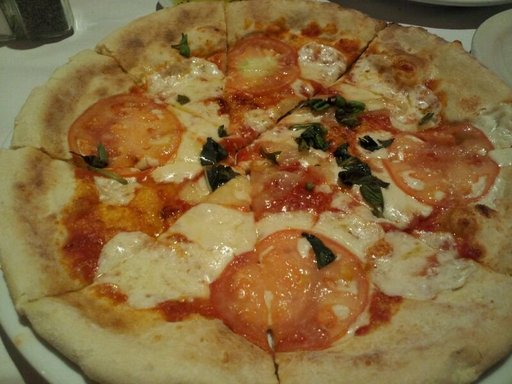

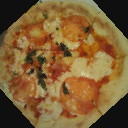

In [6]:
import torch
import torchvision.transforms as transforms
import torchvision
from PIL import Image
from IPython.display import display

# 读取原始图片
image = Image.open("./food-11/training/0_205.jpg")

display(image)

# 应用变换
transformed_image = train_transform(image)

# 输出变换后的图片
transformed_image = transforms.ToPILImage()(transformed_image)
display(transformed_image)

In [7]:
import torch
import torch.nn as nn
import numpy as np


class CNN_simple(nn.Module):
    def __init__(self,):
        super().__init__()
        self.CNN_simple = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),# [64, 128, 128]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [64, 64, 64]

            nn.Conv2d(64, 128, 3, 1, 1), # [128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0), # [128, 32, 32]

            nn.Conv2d(128, 256, 3, 1, 1),# [256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [256, 16, 16]

            nn.Conv2d(256, 512, 3, 1, 1),# [512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [512, 8, 8]

            nn.Conv2d(512, 512, 3, 1, 1),# [512, 8, 8]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),  # [512, 4, 4]
        )
        self.fc = nn.Linear(512, 11)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # 添加平均池化层1
        
    def forward(self,x):
        output = self.CNN_simple(x)
        output = self.avgpool(output)
        output = output.view(output.size(0), -1)  #展成一维张量  [batch_size, 512 * (H/2) * (W/2)]
        output = self.fc(output)
        return output

In [8]:
import torch
import torch.nn as nn
import numpy as np


class CNN_depth(nn.Module):
    def __init__(self,):
        super().__init__()
        self.CNN = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),# [64, 128, 128]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [64, 64, 64]

            nn.Conv2d(64, 128, 3, 1, 1), # [128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0), # [128, 32, 32]

            nn.Conv2d(128, 256, 3, 1, 1),# [256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [256, 16, 16]

            nn.Conv2d(256, 512, 3, 1, 1),# [512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),# [512, 8, 8]

            nn.Conv2d(512, 512, 3, 1, 1),# [512, 8, 8]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),  # [512, 4, 4]
        )
        # self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # 添加平均池化层
        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 11)
        )
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self,x):
        output = self.CNN(x)
        # output = self.avgpool(output)
        output = output.view(output.size(0), -1)  #展成一维张量  [batch_size, 512 * (H/2) * (W/2)]
        output = self.dropout(output)
        output = self.fc(output)
        return output

添加了残差网络

In [9]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # 如果输入和输出的通道数不一致，需要使用1x1卷积层调整通道数
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels)
        )
        
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        # 加法操作
        if self.downsample is not None:
            residual = self.downsample(x)
        
        out += residual
        out = self.relu(out)
        
        return out
    
class CNN_ResNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.CNN = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),
            
            ResidualBlock(64, 128),
            nn.MaxPool2d(2, 2, 0),
            
            ResidualBlock(128, 256),
            nn.MaxPool2d(2, 2, 0),
            
            ResidualBlock(256, 512),
            nn.MaxPool2d(2, 2, 0),
            
            ResidualBlock(512, 512),
            nn.MaxPool2d(2, 2, 0)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(512 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 11)
        )
        
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        output = self.CNN(x)
        output = output.view(output.size(0), -1)
        output = self.dropout(output)
        output = self.fc(output)
        
        return output


In [10]:
# #添加残差网络
# class ResNet(nn.Module):
#     def __init__(self, cnn_model):
#         super(ResNet, self).__init__()
#         self.cnn_model = cnn_model
#         self.residual_conv = nn.Conv2d(512, 11, kernel_size=1)
        
#     def forward(self, x):
#         output = self.cnn_model(x)
#         residual = x  # 将输入作为残差
#         output += residual  # 添加残差连接
#         return output,  # 返回元组形式的结果

## Training

In [11]:
import time
import pandas as pd
import torch
import torch.optim as optim
from tensorboardX import SummaryWriter

device='cuda'


logdir = 'log'
# 定义损失函数
loss_function = torch.nn.CrossEntropyLoss().to(device)

# model_simple=CNN_simple().to(device)
# model_depth=CNN_depth().to(device)
model_ResNet=CNN_ResNet().to(device)


In [12]:
model=model_ResNet

# 定义优化器
optimizer = optim.Adam(model.parameters())

In [13]:
def train(model,train_loader,epo,optimizer_input,loss_input):
    writer = SummaryWriter('./log')
    loss_func=loss_input
    optimizer=optimizer_input
    epochs=epo
    
    for epoch in range(epochs):
        epoch_start_time = time.time()
        train_acc = 0.0
        train_loss = 0.0
        total=0

        model.train()
        for data in train_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            train_pred = model(inputs)
            batch_loss = loss_func(train_pred, labels)
            batch_loss.backward()
            optimizer.step()

            _,id = torch.max(train_pred.data,1)
            train_loss += batch_loss.data
            train_acc +=torch.sum(id == labels.data)

            #将结果 print 出來
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
        (epoch + 1, epochs, time.time()-epoch_start_time, \
        train_acc/train_dataset.__len__(), train_loss/train_dataset.__len__()))
        
    model.eval()
    print('Finished Training')
    writer.close()
    torch.save(model.state_dict,'./model/model.pth')

In [14]:
# epochs=10
# train(model,train_loader,epochs,optimizer,loss_function)

In [15]:
# def test(model,test_loader):
#     model.eval()
#     test_correct = 0.0
#     total = 0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             test_correct += (predicted == labels).sum().item()
#             total += labels.size(0)

#     print(f'Accuracy on test set: {100*(test_correct / total):.3f}%')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def test(model, test_loader):
    model.eval()
    test_correct = 0.0
    total = 0
    predictions = []  # 创建一个空列表用于存储预测结果
    true_labels = []#存储真实结果
    

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # 将预测结果添加到列表中
            true_labels.extend(labels.tolist())
            predictions.extend(predicted.tolist())

    accuracy = 100 * (test_correct / total)
    # 计算混淆矩阵
    y_true = true_labels
    y_pred = predictions
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # 绘制混淆矩阵热力图
    plt.figure(figsize=(11, 11))
    sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.Blues)
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(11))
    plt.yticks(np.arange(11))
    plt.show()

    print(f'Accuracy on test set: {accuracy:.3f}%')
    # #将结果写入CSV
    # with open("ans_ours.csv", 'w') as f:
    #     f.write('Id,Category\n')
    #     for i, y in  enumerate(predictions):
    #         f.write('{},{}\n'.format(i, y))


In [17]:
# test(model_depth,vali_loader)

In [18]:
def train_test(model,train_loader,test_loader,epo,optimizer_input,loss_input):
    writer = SummaryWriter('./log')
    loss_func=loss_input
    optimizer=optimizer_input
    epochs=epo
    
    for epoch in range(epochs):
        epoch_start_time = time.time()
        train_acc = 0.0
        train_loss = 0.0
        total=0

        model.train()
        for data in train_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            train_pred = model(inputs)
            batch_loss = loss_func(train_pred, labels)
            batch_loss.backward()
            optimizer.step()

            _,id = torch.max(train_pred.data,1)
            train_loss += batch_loss.data
            train_acc +=torch.sum(id == labels.data)
        # 在每个epoch后记录train_loss和train_acc
        writer.add_scalar('Train Loss', train_loss/train_dataset.__len__(), epoch)
        writer.add_scalar('Train Accuracy', train_acc/train_dataset.__len__(), epoch)

            #将结果 print 出來
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
        (epoch + 1, epochs, time.time()-epoch_start_time, \
        train_acc/train_dataset.__len__(), train_loss/train_dataset.__len__()))

        model.eval()
        test_correct = 0.0
        total = 0
        predictions = []  # 创建一个空列表用于存储预测结果
        true_lables=[]
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                test_correct += (predicted == labels).sum().item()
                total += labels.size(0)

                # 将预测结果添加到列表中
                predictions.extend(predicted.tolist())
                true_lables.extend(labels.tolist())

        accuracy = 100 * (test_correct / total)
        
        print(f'Accuracy on test set: {accuracy:.3f}%')
        # 在每个epoch后记录测试的accuracy
        writer.add_scalar('Test Accuracy', accuracy, epoch)
            
        
    print('Finished Training')
    #将结果写入CSV
    with open("ans_ours_ungrade.csv", 'w') as f:
        f.write('True,Category\n')
        for i in  range(len(predictions)):
            f.write('{},{}\n'.format(true_lables[i], predictions[i]))
            
    writer.close()
    torch.save(model.state_dict,'./model/model_ResNet'+str(epochs)+'.pth')

In [19]:
epochs=150
train_test(model,train_loader,vali_loader,epochs,optimizer,loss_function)

[001/150] 168.06 sec(s) Train Acc: 0.224914 Loss: 0.068004
Accuracy on test set: 27.843%
[002/150] 48.27 sec(s) Train Acc: 0.312487 Loss: 0.061379
Accuracy on test set: 35.539%
[003/150] 48.41 sec(s) Train Acc: 0.360024 Loss: 0.056814
Accuracy on test set: 40.525%
[004/150] 48.37 sec(s) Train Acc: 0.394486 Loss: 0.053726
Accuracy on test set: 40.554%
[005/150] 48.13 sec(s) Train Acc: 0.435536 Loss: 0.050735
Accuracy on test set: 42.945%
[006/150] 48.39 sec(s) Train Acc: 0.461991 Loss: 0.048183
Accuracy on test set: 45.685%
[007/150] 48.35 sec(s) Train Acc: 0.482161 Loss: 0.046552
Accuracy on test set: 50.204%
[008/150] 48.42 sec(s) Train Acc: 0.501318 Loss: 0.044343
Accuracy on test set: 53.324%
[009/150] 49.19 sec(s) Train Acc: 0.517839 Loss: 0.043830
Accuracy on test set: 45.510%
[010/150] 48.32 sec(s) Train Acc: 0.539124 Loss: 0.041743
Accuracy on test set: 52.362%
[011/150] 48.46 sec(s) Train Acc: 0.552402 Loss: 0.040736
Accuracy on test set: 51.983%
[012/150] 48.15 sec(s) Train Ac

画混淆矩阵

[[283   1  25  18  12   7   1   4   2   9   0]
 [  3  82  42   0   2   0   2   2   1  10   0]
 [ 23  10 387   7  12  17   0   0  13  28   3]
 [ 31   4  14 252   2   4   2   1   4  11   2]
 [ 44   1  25   1 227  12   1   1   5   8   1]
 [ 33   6  32   2  13 337   1   1  13  11   0]
 [  2   0   1   2   1   1 133   3   0   4   0]
 [ 11   0   4   1   1   1   2  74   0   2   0]
 [ 16   5  22   8   3  13   0   0 268   8   4]
 [  6   3  13   6   2   2   1   0   4 462   1]
 [  3   2   7   1   6   3   2   1  10   0 197]]


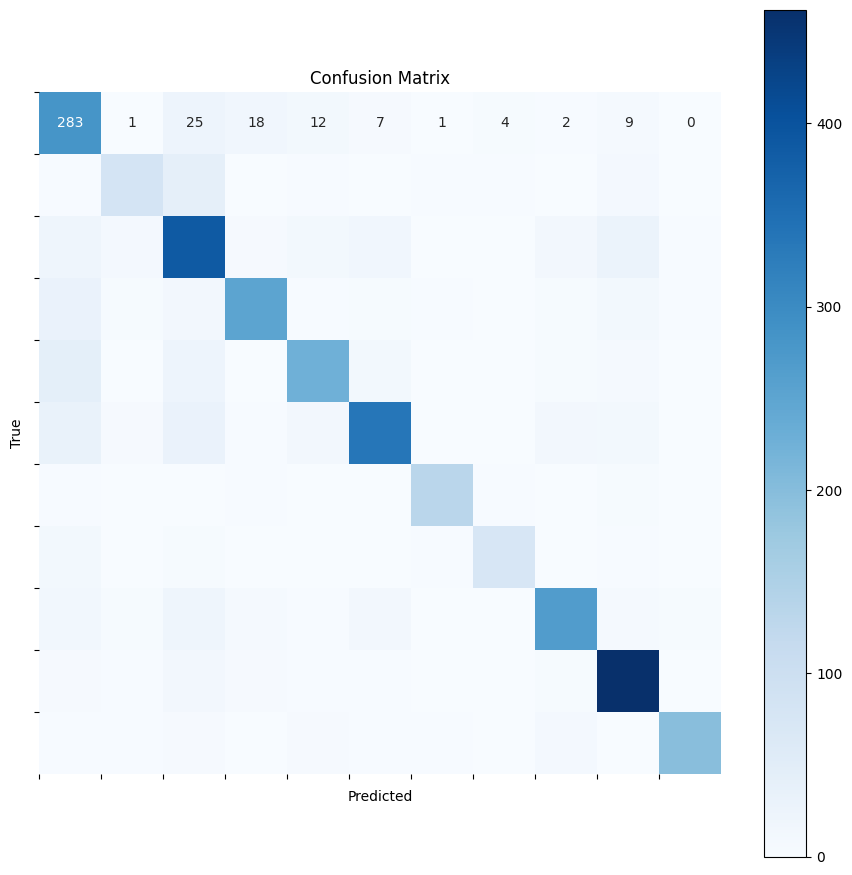

Accuracy on test set: 78.776%


In [20]:
test(model,vali_loader)

In [22]:
model.to('cpu')

CNN_ResNet(
  (CNN): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6

VGG-16

In [ ]:
import torch
import torchvision.models as models

# 调用VGG16模型
model = models.vgg16(pretrained=False)

# 打印网络结构
print(model)

d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

VGG-19

In [ ]:
import torch
import torchvision.models as models

# 调用VGG16模型
model = models.vgg19(pretrained=False)

# 打印网络结构
print(model)

d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

使用VGG16进行预测

In [22]:
def train_test_vgg(model,train_loader,test_loader,epo,optimizer_input,loss_input):
    loss_func=loss_input
    optimizer=optimizer_input
    epochs=epo
    
    for epoch in range(epochs):
        epoch_start_time = time.time()
        train_acc = 0.0
        train_loss = 0.0
        total=0

        model.train()
        for data in train_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            train_pred = model(inputs)
            batch_loss = loss_func(train_pred, labels)
            batch_loss.backward()
            optimizer.step()

            _,id = torch.max(train_pred.data,1)
            train_loss += batch_loss.data
            train_acc +=torch.sum(id == labels.data)

            #将结果 print 出來
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
        (epoch + 1, epochs, time.time()-epoch_start_time, \
        train_acc/train_dataset.__len__(), train_loss/train_dataset.__len__()))

        model.eval()
        test_correct = 0.0
        total = 0
        predictions = []  # 创建一个空列表用于存储预测结果
        true_lables=[]
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                test_correct += (predicted == labels).sum().item()
                total += labels.size(0)

                # 将预测结果添加到列表中
                predictions.extend(predicted.tolist())
                true_lables.extend(labels.tolist())

        accuracy = 100 * (test_correct / total)
        
        print(f'Accuracy on test set: {accuracy:.3f}%')
        # 在每个epoch后记录测试的accuracy
            
        
    print('Finished Training')
    #将结果写入CSV
    with open("ans_vgg.csv", 'w') as f:
        f.write('true,Category\n')
        for i in  range(len(predictions)):
            f.write('{},{}\n'.format(true_lables[i], predictions[i]))
            
    torch.save(model.state_dict,'./model/model_vgg.pth')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def test_vgg(model, test_loader):
    model.eval()
    test_correct = 0.0
    total = 0
    predictions = []  # 创建一个空列表用于存储预测结果
    true_labels = []#存储真实结果
    

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # 将预测结果添加到列表中
            true_labels.extend(labels.tolist())
            predictions.extend(predicted.tolist())

    accuracy = 100 * (test_correct / total)
    # 计算混淆矩阵
    y_true = true_labels
    y_pred = predictions
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # 绘制混淆矩阵热力图
    plt.figure(figsize=(11, 11))
    sns.heatmap(cm,square=True,annot=True,fmt='d',cbar=False,cmap=plt.cm.Blues)
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(11))
    plt.yticks(np.arange(11))
    plt.show()

    # print(f'Accuracy on test set: {accuracy:.3f}%')
    # #将结果写入CSV
    # with open("ans_vgg.csv", 'w') as f:
    #     f.write('True,Category\n')
    #     for i in  range(len(predictions)):
    #         f.write('{},{}\n'.format(true_labels[i], predictions[i]))


In [23]:
import torch
import torchvision.models as models
import torch.optim as optim
import time
device='cuda'
vgg16 = models.vgg16(pretrained=True)

# 加载预训练的VGG16模型
vgg16 = models.vgg16(pretrained=False)

# 冻结所有参数
for param in vgg16.parameters():
    param.requires_grad = False

# 修改最后一层
num_features = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = torch.nn.Linear(num_features, 11)

# 将最后一层的参数设置为可训练
for param in vgg16.classifier[-1].parameters():
    param.requires_grad = True

# 将模型加载到CUDA设备上（如果可用）
if torch.cuda.is_available():
    vgg16 = vgg16.to('cuda')
loss_function = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(vgg16.parameters())
epochs=20
train_test_vgg(vgg16,train_loader,vali_loader,epochs,optimizer,loss_function)


d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Anaconda3\envs\program\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[001/020] 47.41 sec(s) Train Acc: 0.154673 Loss: 0.072189
Accuracy on test set: 14.577%
[002/020] 46.89 sec(s) Train Acc: 0.163491 Loss: 0.071761
Accuracy on test set: 14.840%
[003/020] 46.52 sec(s) Train Acc: 0.176667 Loss: 0.071446
Accuracy on test set: 16.910%
[004/020] 46.40 sec(s) Train Acc: 0.170079 Loss: 0.071361
Accuracy on test set: 15.394%
[005/020] 46.55 sec(s) Train Acc: 0.175350 Loss: 0.071090
Accuracy on test set: 20.029%
[006/020] 46.43 sec(s) Train Acc: 0.178897 Loss: 0.070881
Accuracy on test set: 18.688%
[007/020] 46.57 sec(s) Train Acc: 0.188830 Loss: 0.070604
Accuracy on test set: 21.224%
[008/020] 47.51 sec(s) Train Acc: 0.182546 Loss: 0.070464
Accuracy on test set: 22.157%
[009/020] 46.68 sec(s) Train Acc: 0.191364 Loss: 0.070608
Accuracy on test set: 22.945%
[010/020] 47.01 sec(s) Train Acc: 0.190553 Loss: 0.070274
Accuracy on test set: 22.507%
[011/020] 47.10 sec(s) Train Acc: 0.188425 Loss: 0.070242
Accuracy on test set: 16.443%
[012/020] 46.78 sec(s) Train Acc

[[131   1  13  35   0   5   0   0   0 164  13]
 [ 14  15  16  49   0   0   0   0   0  46   4]
 [ 76   0  83 105   0  40   0   0   0 175  21]
 [ 77   1  24 100   1   1   1   0   0 107  15]
 [ 98   0  11  14   0  11   0   0   0 175  17]
 [ 60   0  44  17   0  96   0   0   0 209  23]
 [ 51   0   3  10   0   3   1   0   0  72   7]
 [ 41   0   2  11   0   0   0   0   0  36   6]
 [ 78   0  36  61   1  29   0   0   0 112  30]
 [ 61   3  10  56   0  27   0   0   0 336   7]
 [ 52   0  18  11   1  10   0   0   0  48  92]]


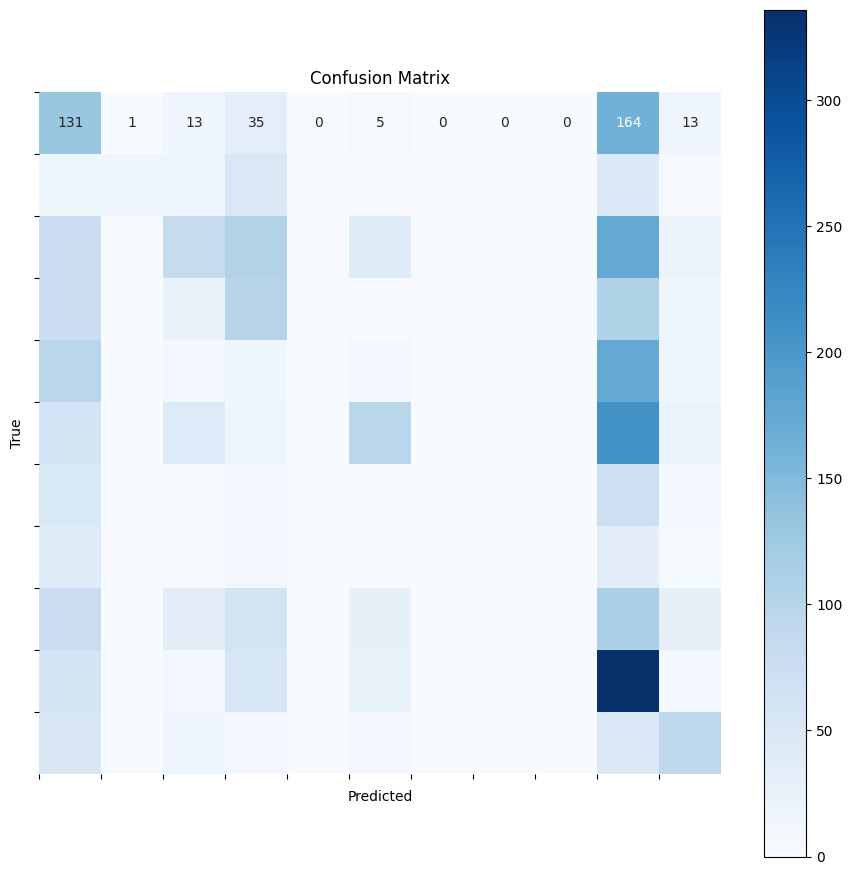

Accuracy on test set: 24.898%


In [24]:
test_vgg(vgg16,vali_loader)